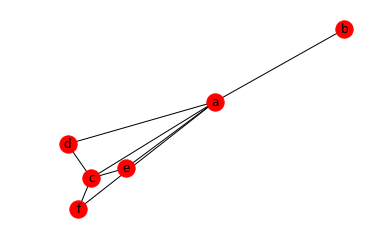

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

w_G = nx.Graph()
w_G.add_edge('a', 'b', weight=0.6)
w_G.add_edge('a', 'c', weight=0.2)
w_G.add_edge('c', 'd', weight=20.0)
w_G.add_edge('c', 'e', weight=30.0)
w_G.add_edge('a', 'e', weight=1.0)
w_G.add_edge('c', 'f', weight=40.0)
w_G.add_edge('a', 'f', weight=0.1)
w_G.add_edge('a', 'd', weight=0.3)

uw_G = nx.Graph()
uw_G.add_edge('a', 'b', weight=1.0)
uw_G.add_edge('a', 'c', weight=1.0)
uw_G.add_edge('c', 'd', weight=1.0)
uw_G.add_edge('c', 'e', weight=1.0)
uw_G.add_edge('c', 'f', weight=1.0)
uw_G.add_edge('a', 'd', weight=1.0)


nx.draw_networkx(w_G)
plt.axis('off')
plt.show()

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

def weighted_degree_centrality(input_g, normalized=False):
    w_d_centrality = {n:0.0 for n in input_g.nodes()}
    for u, v, d in input_g.edges(data=True):
        w_d_centrality[u]+=d['weight']
        w_d_centrality[v]+=d['weight']
    if normalized==True:
        weighted_sum = sum(w_d_centrality.values())
        return {k:v/weighted_sum for k, v in w_d_centrality.items()}
    else:
        return w_d_centrality
print(weighted_degree_centrality(w_G)) # 
"""
closeness의 경우 distance로 되어 있기 때문에, weight와 개념이 다름 
빈도라면 distance로 고려하고 역수로 변경해주는 것이 필요함. 중요할 수록 낮은 값. 

betweenness_centrality의 경우 argument의 이름이 distance가 아니라 weight이며, 중요할수록 높은 값. 

eigenvector centrality 또한 중요할 수록 weight의 값이 높아야 함.

따라서 헷갈리지 않기 위해서는 네트워크 내에 distance 라는 attribute를 하나 더 만들어서 두는 편이 더 좋을 수 있음.
"""
nx.closeness_centrality(w_G, distance='weight')
nx.betweenness_centrality(w_G, weight='weight')
nx.algorithms.eigenvector_centrality(w_G, weight='weight')


{'a': 2.2, 'b': 0.6, 'c': 90.2, 'd': 20.3, 'e': 31.0, 'f': 40.1}


PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [87]:
G = nx.Graph()
G.add_edge('a', 'b', weight=3.0)
G.add_edge('a', 'c', weight=1.0)
G.add_edge('c', 'b', weight=1.0)

print( nx.betweenness_centrality(G, weight='weight') )

G = nx.Graph()
G.add_edge('a', 'b', weight=0.5)
G.add_edge('a', 'c', weight=0.1)
G.add_edge('c', 'b', weight=100.0)

print( nx.betweenness_centrality(G, weight='weight') )

{'a': 0.0, 'b': 0.0, 'c': 1.0}
{'a': 1.0, 'b': 0.0, 'c': 0.0}


In [77]:
nx.betweenness_centrality(w_G)

{'a': 0.55, 'b': 0.0, 'c': 0.15000000000000002, 'd': 0.0, 'e': 0.0, 'f': 0.0}

{'a': 0.55, 'b': 0.0, 'c': 0.15000000000000002, 'd': 0.0, 'e': 0.0, 'f': 0.0}

In [74]:
"""
예전에도 비슷했던 것 같은데, weighted G에 대해서 계산을 안 해줌. 
그래서 예전에는 edge의 weight를 고려해서 이를 임의로 multiG로 변환해서 진행했던 경험이 있는데. 
"""
nx.betweenness_centrality(w_G, weight=True) == nx.betweenness_centrality(w_G)

True